<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 131.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 164.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 137.4 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [21]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [22]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [23]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [24]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [25]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [26]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [27]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


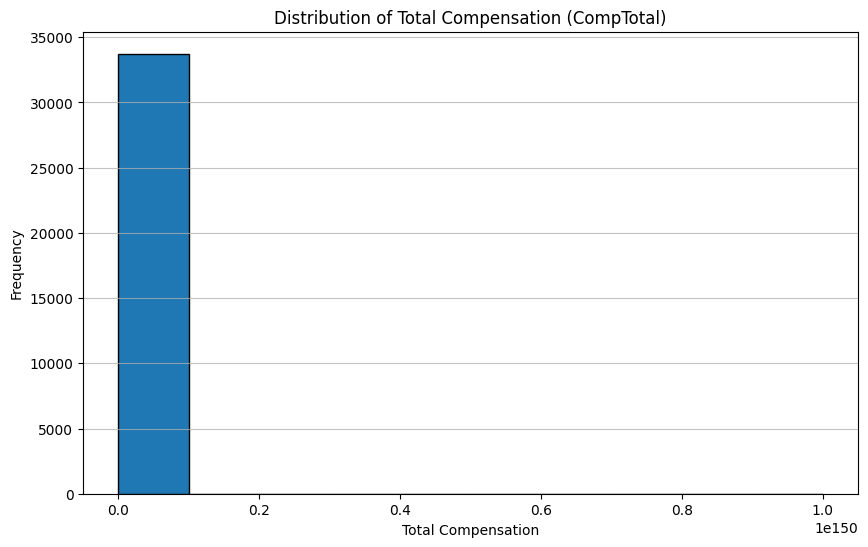

In [33]:
QUERY = """
SELECT CompTotal
FROM main
"""
df_comptotal = pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(10, 6))
df_comptotal['CompTotal'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


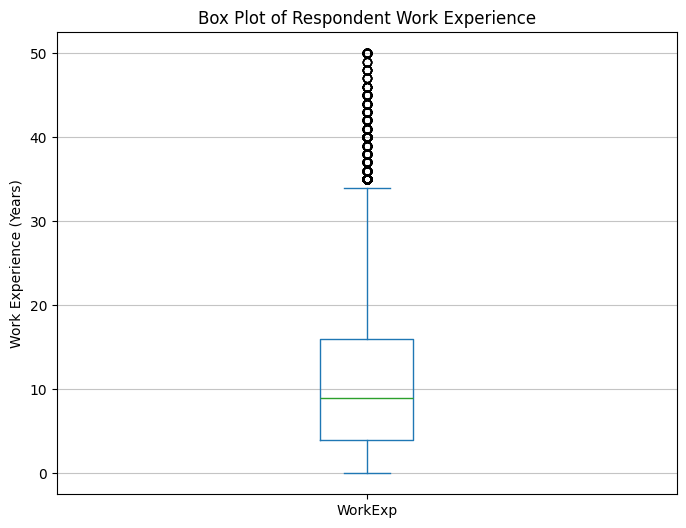

In [34]:
QUERY = """
SELECT WorkExp
FROM main
"""
df_workexp = pd.read_sql_query(QUERY, conn)
df_workexp.dropna(subset=['WorkExp'], inplace=True)
plt.figure(figsize=(8, 6))
df_workexp['WorkExp'].plot(kind='box')
plt.title('Box Plot of Respondent Work Experience')
plt.ylabel('Work Experience (Years)')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


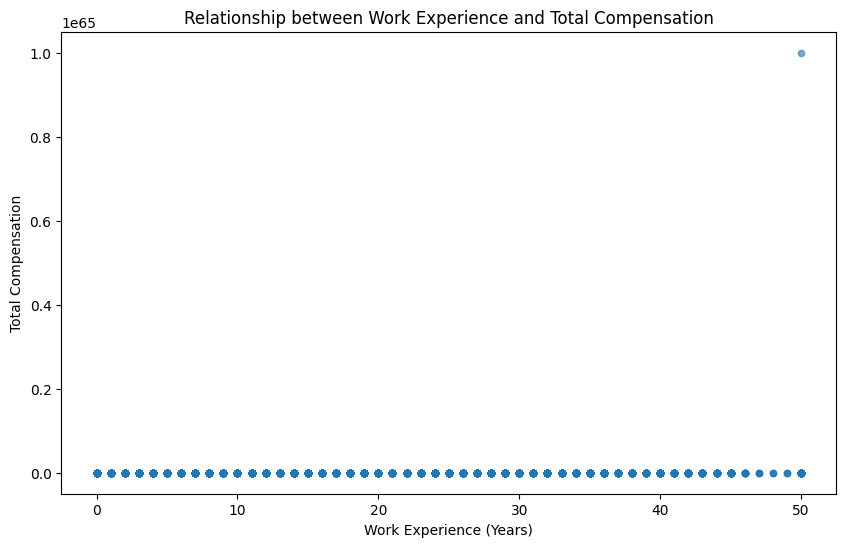

In [35]:
QUERY = """
SELECT WorkExp, CompTotal
FROM main
"""
df_scatter = pd.read_sql_query(QUERY, conn)
df_scatter.dropna(subset=['WorkExp', 'CompTotal'], inplace=True)
df_scatter.plot(kind='scatter', x='WorkExp', y='CompTotal', figsize=(10, 6), alpha=0.6)
plt.title('Relationship between Work Experience and Total Compensation')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Total Compensation')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


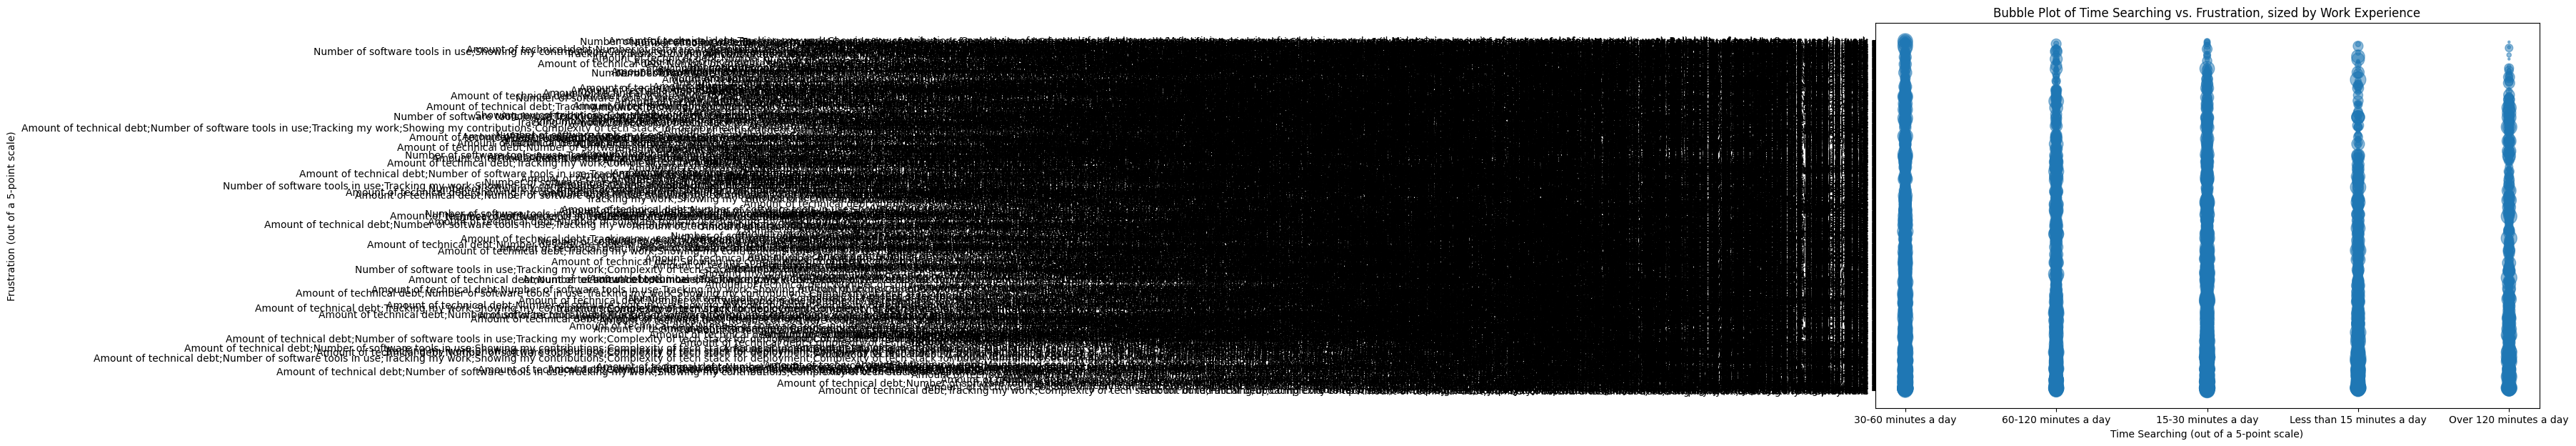

In [37]:
QUERY = """
SELECT TimeSearching, Frustration, WorkExp
FROM main
"""
df_bubble = pd.read_sql_query(QUERY, conn)
df_bubble.dropna(subset=['TimeSearching', 'Frustration', 'WorkExp'], inplace=True)
df_bubble['WorkExp_Scaled'] = df_bubble['WorkExp'] * 5
df_bubble.plot(kind='scatter', 
               x='TimeSearching', 
               y='Frustration', 
               s='WorkExp_Scaled', 
               alpha=0.5, 
               figsize=(12, 7))
plt.title('Bubble Plot of Time Searching vs. Frustration, sized by Work Experience')
plt.xlabel('Time Searching (out of a 5-point scale)')
plt.ylabel('Frustration (out of a 5-point scale)')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


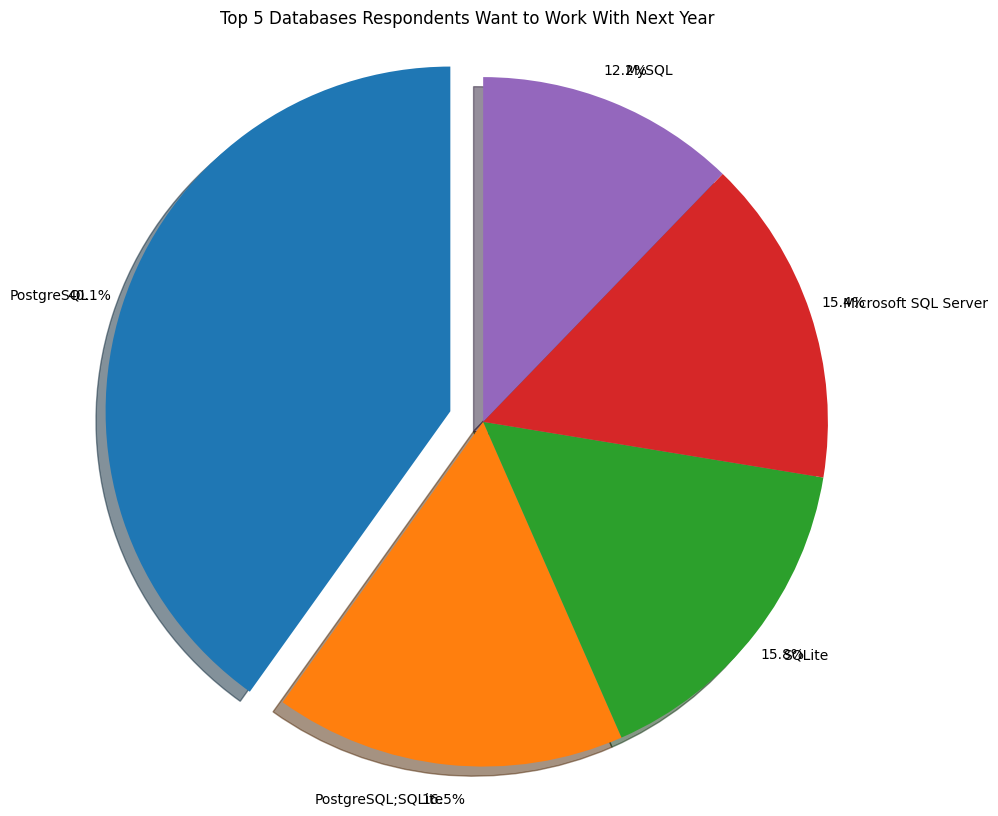

In [38]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL AND DatabaseWantToWorkWith != ''
GROUP BY DatabaseWantToWorkWith
ORDER BY Count DESC
LIMIT 5
"""
df_pie = pd.read_sql_query(QUERY, conn)
explode_list = [0.1, 0, 0, 0, 0] 
df_pie['Count'].plot(kind='pie',
                     figsize=(10, 10),
                     autopct='%1.1f%%', 
                     startangle=90,    
                     shadow=True,      
                     labels=df_pie['DatabaseWantToWorkWith'],
                     pctdistance=1.1,  
                     explode=explode_list
                    )
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.ylabel('')
plt.axis('equal')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


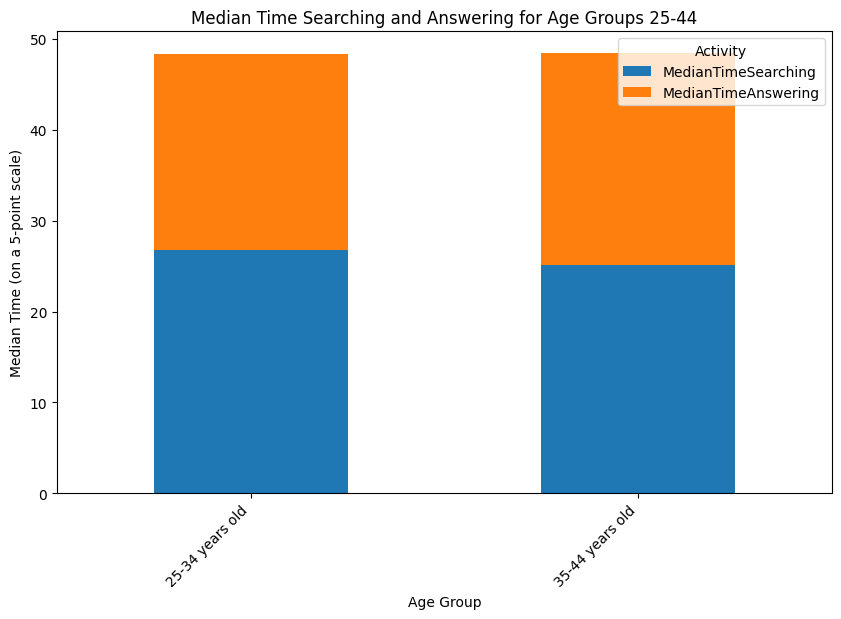

In [39]:
QUERY = """
SELECT Age, 
       CAST(AVG(TimeSearching) AS REAL) AS MedianTimeSearching,
       CAST(AVG(TimeAnswering) AS REAL) AS MedianTimeAnswering
FROM main
WHERE Age = '25-34 years old' OR Age = '35-44 years old'
GROUP BY Age
ORDER BY Age
"""
df_stacked = pd.read_sql_query(QUERY, conn)
df_stacked.set_index('Age', inplace=True)
df_stacked.plot(kind='bar', 
                stacked=True, 
                figsize=(10, 6))
plt.title('Median Time Searching and Answering for Age Groups 25-44')
plt.xlabel('Age Group')
plt.ylabel('Median Time (on a 5-point scale)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Activity')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


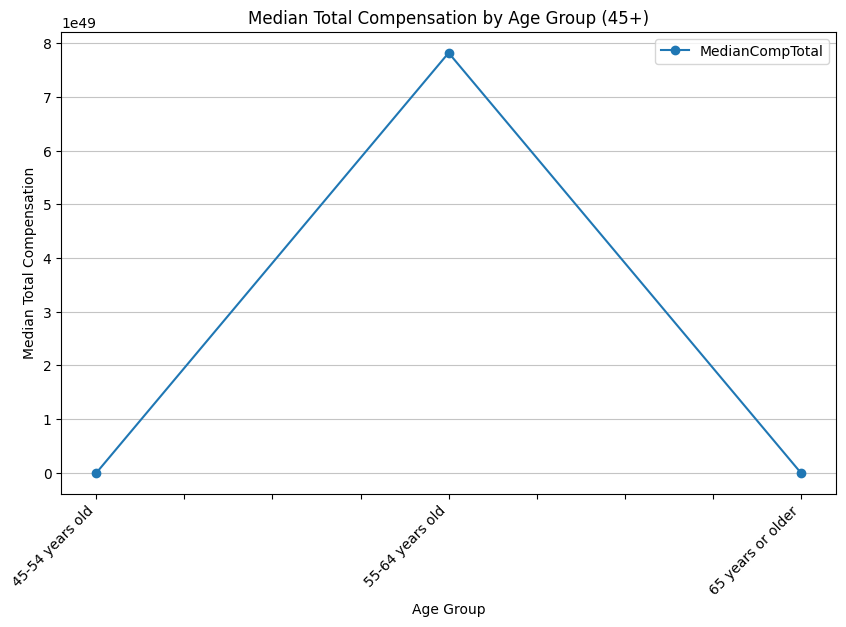

In [40]:
QUERY = """
SELECT Age, 
       CAST(AVG(CompTotal) AS REAL) AS MedianCompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old', '65 years or older')
GROUP BY Age
ORDER BY Age
"""
df_line = pd.read_sql_query(QUERY, conn)
df_line.set_index('Age', inplace=True)
df_line.plot(kind='line', 
             figsize=(10, 6), 
             marker='o')
plt.title('Median Total Compensation by Age Group (45+)')
plt.xlabel('Age Group')
plt.ylabel('Median Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


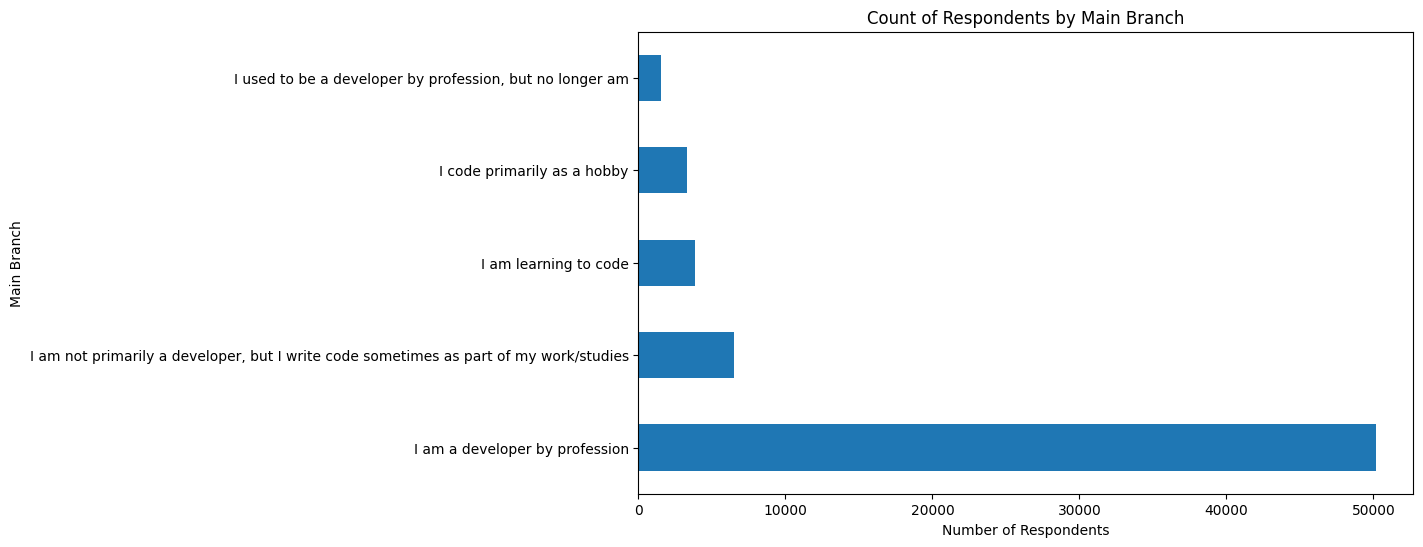

In [41]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Count
FROM main
GROUP BY MainBranch
ORDER BY Count DESC
"""
df_bar = pd.read_sql_query(QUERY, conn)
df_bar.set_index('MainBranch', inplace=True)
df_bar['Count'].plot(kind='barh', figsize=(10, 6))
plt.title('Count of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [42]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
